# Stock Price Prediction Using LSTM 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv('MSFT.csv')

In [2]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2015-01-02T00:00:00.000Z,46.760,47.4200,46.54,46.66,27913852,40.304641,40.873526,40.115012,40.218446,27913852,0.0,1.0
1,2015-01-05T00:00:00.000Z,46.325,46.7300,46.25,46.37,39673865,39.929694,40.278782,39.865048,39.968481,39673865,0.0,1.0
2,2015-01-06T00:00:00.000Z,45.650,46.7490,45.54,46.38,36447854,39.347880,40.295159,39.253065,39.977101,36447854,0.0,1.0
3,2015-01-07T00:00:00.000Z,46.230,46.4600,45.49,45.98,29114061,39.847809,40.046057,39.209968,39.632322,29114061,0.0,1.0
4,2015-01-08T00:00:00.000Z,47.590,47.7499,46.72,46.75,29645202,41.020057,41.157882,40.270163,40.296021,29645202,0.0,1.0


In [3]:
df.tail()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
2350,2024-05-06T00:00:00.000Z,413.54,413.93,406.3701,408.760,16996639,412.808209,413.197519,405.650997,408.036668,16996639,0.0,1.0
2351,2024-05-07T00:00:00.000Z,409.34,414.67,409.0900,414.660,20018228,408.615641,413.936209,408.366084,413.926227,20018228,0.0,1.0
2352,2024-05-08T00:00:00.000Z,410.54,412.23,406.7132,408.170,11792308,409.813518,411.500527,405.993490,407.447712,11792308,0.0,1.0
2353,2024-05-09T00:00:00.000Z,412.32,412.72,409.1000,410.570,14689727,411.590368,411.989660,408.376066,409.843465,14689727,0.0,1.0
2354,2024-05-10T00:00:00.000Z,414.74,415.38,411.8000,412.935,13402281,414.006085,414.644953,411.071288,412.204280,13402281,0.0,1.0


In [4]:
df1=df.reset_index()['close']

In [5]:
df1

0        46.760
1        46.325
2        45.650
3        46.230
4        47.590
         ...   
2350    413.540
2351    409.340
2352    410.540
2353    412.320
2354    414.740
Name: close, Length: 2355, dtype: float64

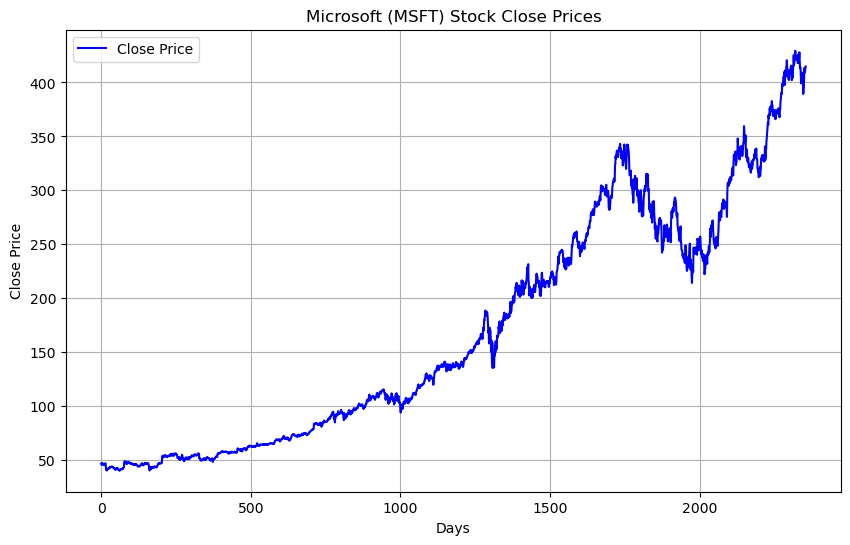

In [6]:
# Plotting the 'close' prices
plt.figure(figsize=(10, 6))
plt.plot(df1, color='blue', label='Close Price')
plt.title('Microsoft (MSFT) Stock Close Prices')
plt.xlabel('Days')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()


In [7]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Normalize the data
scaler = MinMaxScaler(feature_range=(0,1))
df1_scaled = scaler.fit_transform(np.array(df1).reshape(-1,1))

## Splitting dataset into train and test split
training_size = int(len(df1_scaled) * 0.7)
test_size = len(df1_scaled) - training_size
train_data, test_data = df1_scaled[0:training_size,:], df1_scaled[training_size:len(df1_scaled),:1]

# Function to create dataset with sliding window
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step):
        a = dataset[i:(i+time_step), 0]  # Features
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])  # Target variable
    return np.array(dataX), np.array(dataY)

# Define the time step
time_step = 100

# Create training and test sets with sliding window
X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [8]:
print(X_test.shape), print(y_test.shape)

(607, 100, 1)
(607,)


(None, None)

In [9]:
# Define the model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(units=50, return_sequences=True))
model.add(LSTM(units=50))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=64, verbose=1)

# Evaluate the model
train_loss = model.evaluate(X_train, y_train, verbose=0)
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f"Train Loss: {train_loss}")
print(f"Test Loss: {test_loss}")

Epoch 1/100


C:\Users\ROG\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 83ms/step - loss: 0.0192 - val_loss: 0.0019
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 60ms/step - loss: 7.3622e-04 - val_loss: 0.0030
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - loss: 3.7342e-04 - val_loss: 0.0016
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 59ms/step - loss: 2.2292e-04 - val_loss: 0.0018
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 2.0292e-04 - val_loss: 0.0017
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 2.0843e-04 - val_loss: 0.0016
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 1.9139e-04 - val_loss: 0.0016
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - loss: 2.3171e-04 - val_loss: 0.0023
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 2.0484e-04 - val_loss: 0.0016
Epoch 10/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 1.9145e-04 - val_loss: 0.0017
Epoch 11/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 1.9421e-04 - val_loss: 0.0015
Epoch 12/100
25/25 ━━━━━

Epoch 66/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - loss: 9.4222e-05 - val_loss: 6.6720e-04
Epoch 67/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 7.7136e-05 - val_loss: 6.5308e-04
Epoch 68/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 9.2922e-05 - val_loss: 6.4645e-04
Epoch 69/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 9.7356e-05 - val_loss: 7.2754e-04
Epoch 70/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 8.1068e-05 - val_loss: 5.7371e-04
Epoch 71/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 9.1340e-05 - val_loss: 7.7698e-04
Epoch 72/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 8.0337e-05 - val_loss: 6.0589e-04
Epoch 73/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 65ms/step - loss: 8.1823e-05 - val_loss: 6.1986e-04
Epoch 74/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 1.0653e-04 - val_loss: 6.3375e-04
Epoch 75/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - loss: 8.0468e-05 - val_loss: 7.6696e-04
Epoch 76/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/st

In [10]:
from sklearn.metrics import mean_squared_error
import math

# Predicting train and test data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Reshape predictions to match expected shape
y_train_pred = y_train_pred.reshape(-1, 1)
y_test_pred = y_test_pred.reshape(-1, 1)

# Inverse transforming the scaled data to original scale
y_train_actual = scaler.inverse_transform(y_train.reshape(-1, 1))
y_train_pred = scaler.inverse_transform(y_train_pred)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred)

# Calculating RMSE for train and test data
train_rmse = math.sqrt(mean_squared_error(y_train_actual, y_train_pred))
test_rmse = math.sqrt(mean_squared_error(y_test_actual, y_test_pred))

print(f"Train RMSE: {train_rmse}")
print(f"Test RMSE: {test_rmse}")


49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Train RMSE: 2.7981705604374145
Test RMSE: 7.808772039958474


In [11]:
y_test_pred

array([[332.1076 ],
       [335.81906],
       [338.06854],
       [334.7143 ],
       [331.6886 ],
       [327.5132 ],
       [323.8197 ],
       [320.66058],
       [321.44882],
       [326.39105],
       [332.1701 ],
       [338.53824],
       [342.5128 ],
       [343.79855],
       [342.45593],
       [339.39307],
       [336.26077],
       [332.49292],
       [325.4269 ],
       [318.2435 ],
       [314.11853],
       [313.4387 ],
       [314.9461 ],
       [317.9218 ],
       [316.12106],
       [313.65836],
       [310.0052 ],
       [307.2854 ],
       [305.74667],
       [303.63138],
       [301.8809 ],
       [298.677  ],
       [298.22736],
       [300.94986],
       [307.1251 ],
       [313.93484],
       [317.69296],
       [319.73703],
       [316.59357],
       [313.13498],
       [309.85065],
       [308.9874 ],
       [312.00226],
       [313.20584],
       [309.91153],
       [305.21707],
       [303.63947],
       [304.41614],
       [303.12033],
       [299.6726 ],


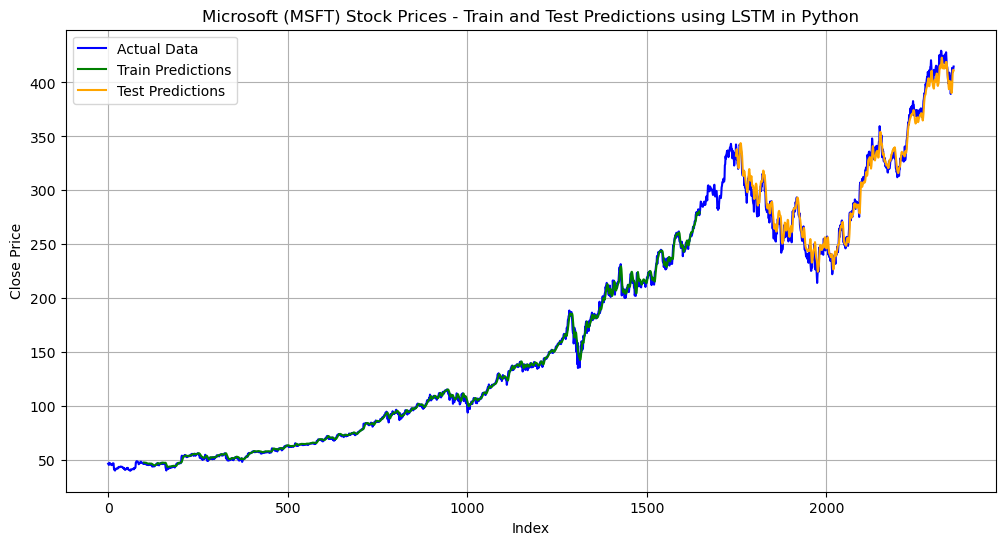

In [12]:
# Ensure that df1_scaled is also inverse transformed to original scale
df1_original = scaler.inverse_transform(df1_scaled)

# Plotting train and test predictions along with actual data
plt.figure(figsize=(12, 6))

# Creating empty arrays for plotting train and test predictions
trainPredictPlot = np.empty_like(df1_original)
trainPredictPlot[:, :] = np.nan
testPredictPlot = np.empty_like(df1_original)
testPredictPlot[:, :] = np.nan

# Plotting train predictions
train_pred_index = np.arange(time_step, time_step + len(y_train_pred))
trainPredictPlot[train_pred_index] = y_train_pred

# Plotting test predictions
test_pred_index = np.arange(len(df1_original) - len(y_test_pred), len(df1_original))
testPredictPlot[test_pred_index] = y_test_pred

# Plotting actual data
plt.plot(df1_original, label='Actual Data', color='blue')

# Plotting train predictions
plt.plot(trainPredictPlot, label='Train Predictions', color='green')

# Plotting test predictions
plt.plot(testPredictPlot, label='Test Predictions', color='orange')

plt.title('Microsoft (MSFT) Stock Prices - Train and Test Predictions using LSTM in Python')
plt.xlabel('Index')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [13]:
# Predicting future prices for the next 15 days
future_predictions = []
last_sequence = df1_scaled[-time_step:].reshape(1, time_step, 1)  # Start prediction from the last sequence of the data

for _ in range(15):
    future_prediction = model.predict(last_sequence)[0][0]
    future_predictions.append(future_prediction)
    last_sequence = np.append(last_sequence[:, 1:, :], np.array([[future_prediction]]).reshape(1, 1, 1), axis=1)  # Update the sequence for the next prediction

# Inverse transforming future predictions to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [14]:
# Print future predictions
print("Future Predictions for the next 15 days:")
for i, pred in enumerate(future_predictions):
    print(f"Day {i + 1}: {pred[0]}")

Future Predictions for the next 15 days:
Day 1: 411.3962707519531
Day 2: 411.1933898925781
Day 3: 410.41387939453125
Day 4: 409.3879699707031
Day 5: 408.3147277832031
Day 6: 407.2641906738281
Day 7: 406.24627685546875
Day 8: 405.2553405761719
Day 9: 404.2850341796875
Day 10: 403.33074951171875
Day 11: 402.3898010253906
Day 12: 401.46087646484375
Day 13: 400.5460205078125
Day 14: 399.6499938964844
Day 15: 398.780517578125
